In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/dogs_cats.zip"


'/content/drive/My Drive/dogs_cats.zip'


In [ ]:
!ls "/content/drive/My Drive/dogs_cats.zip"


'/content/drive/My Drive/dogs_cats.zip'


In [ ]:
!unzip "/content/drive/My Drive/dogs_cats.zip" -d "/content/dogs_cats_dataset"


Archive:  /content/drive/My Drive/dogs_cats.zip
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_1.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_10.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_100.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_101.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_102.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_103.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_105.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_106.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_107.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_108.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_109.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_11.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_110.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_112.wav  
  inflating: /content/dogs_cats_dataset/cats_dogs/cat_113.wa

In [ ]:
import os
os.listdir("/content/dogs_cats_dataset")


FileNotFoundError: ignored

In [ ]:
os.listdir("/content/dogs_cats_dataset/cats_dogs")


['dog_barking_57.wav',
 'cat_159.wav',
 'cat_28.wav',
 'dog_barking_101.wav',
 'cat_79.wav',
 'dog_barking_89.wav',
 'cat_78.wav',
 'dog_barking_50.wav',
 'dog_barking_20.wav',
 'cat_23.wav',
 'dog_barking_66.wav',
 'cat_100.wav',
 'dog_barking_76.wav',
 'dog_barking_67.wav',
 'dog_barking_41.wav',
 'dog_barking_59.wav',
 'dog_barking_65.wav',
 'cat_143.wav',
 'cat_25.wav',
 'cat_18.wav',
 'cat_133.wav',
 'cat_31.wav',
 'dog_barking_44.wav',
 'cat_88.wav',
 'cat_11.wav',
 'dog_barking_74.wav',
 'cat_74.wav',
 'dog_barking_91.wav',
 'dog_barking_47.wav',
 'cat_119.wav',
 'dog_barking_48.wav',
 'cat_148.wav',
 'dog_barking_83.wav',
 'dog_barking_109.wav',
 'dog_barking_63.wav',
 'dog_barking_6.wav',
 'cat_124.wav',
 'dog_barking_92.wav',
 'cat_75.wav',
 'cat_29.wav',
 'cat_6.wav',
 'cat_108.wav',
 'cat_164.wav',
 'dog_barking_78.wav',
 'cat_84.wav',
 'cat_50.wav',
 'dog_barking_3.wav',
 'cat_112.wav',
 'dog_barking_73.wav',
 'cat_52.wav',
 'train',
 'cat_42.wav',
 'dog_barking_34.wav',
 

In [ ]:
import pandas as pd
train_test_data = pd.read_csv("/content/dogs_cats_dataset/train_test_split.csv")
train_test_data.head()


,Unnamed: 0,test_cat,test_dog,train_cat,train_dog
0,0,cat_22.wav,dog_barking_97.wav,cat_99.wav,dog_barking_33.wav
1,1,cat_116.wav,dog_barking_0.wav,cat_54.wav,dog_barking_86.wav
2,2,cat_155.wav,dog_barking_93.wav,cat_34.wav,dog_barking_45.wav
3,3,cat_58.wav,dog_barking_10.wav,cat_132.wav,dog_barking_76.wav
4,4,cat_77.wav,dog_barking_26.wav,cat_124.wav,dog_barking_4.wav


# **Step 1: Exploratory Data Analysis (EDA)**

## **Visualization of Audio Waveforms:**

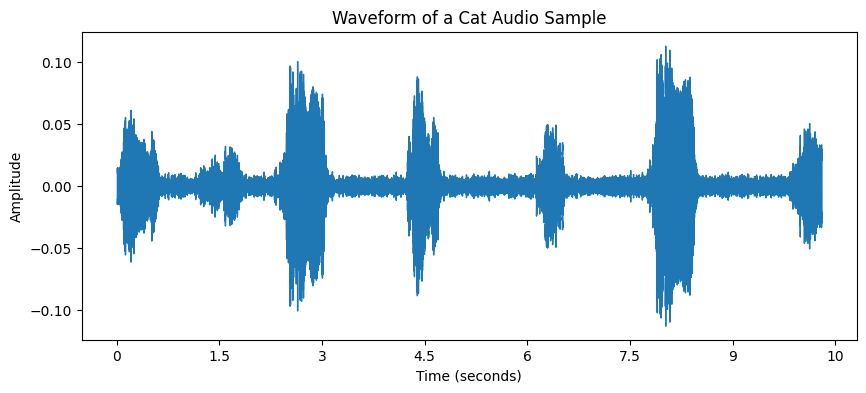

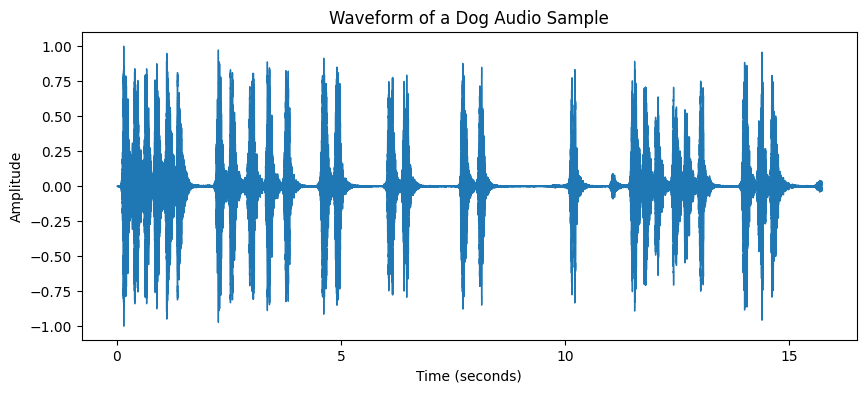

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load a cat audio file
cat_audio_path = "/content/dogs_cats_dataset/cats_dogs/cat_22.wav"
cat_signal, sr = librosa.load(cat_audio_path, sr=None)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(cat_signal, sr=sr)
plt.title('Waveform of a Cat Audio Sample')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# Load a dog audio file
dog_audio_path = "/content/dogs_cats_dataset/cats_dogs/dog_barking_97.wav"
dog_signal, sr = librosa.load(dog_audio_path, sr=None)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(dog_signal, sr=sr)
plt.title('Waveform of a Dog Audio Sample')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


# **Insights from the Waveforms:**

Signal Amplitude: The waveform essentially plots amplitude versus time. High amplitudes can indicate louder sounds, while low amplitudes can indicate softer or absent sounds.
Sound Events: Sudden spikes or patterns in the waveform can indicate specific sound events or activities in the audio.
Silence or Quiet Periods: Areas where the waveform is close to the x-axis (zero amplitude) can indicate periods of silence or very low-volume sounds.
Duration: The width of the waveform shows the duration of the audio clip. This can be useful to compare the lengths of different recordings.
Insights from the Spectrograms:
Frequency Components: The y-axis of the spectrogram represents different frequencies. Brighter regions at specific frequencies indicate the presence of those frequency components in the audio at that point in time.
Intensity of Frequencies: The color intensity in the spectrogram indicates the amplitude or loudness of a specific frequency at a particular time. Brighter colors represent higher amplitudes, while darker colors represent lower amplitudes.
Frequency Variation over Time: A spectrogram allows us to see how different frequency components evolve over time. For instance, if a particular frequency band brightens and then darkens, it indicates that sound at that frequency was present and then faded.
Dominant Frequencies: The brightest bands or lines in the spectrogram indicate the most dominant frequencies in the audio. In the context of animal sounds, these dominant frequencies can often be characteristic of specific calls or vocalizations.
Background Noise: Consistent patterns or colors across the entire duration might indicate background noise or consistent sounds in the recording environment.
Specific Observations for Cat and Dog Sounds:
Without seeing the actual visualizations, I can provide some general observations that might be applicable:

Cat Sounds: Cat vocalizations can vary from low-frequency purring to high-frequency meows. If you see a wide range of frequencies in the cat's spectrogram, it might indicate various vocalizations in the audio clip.
Dog Sounds: Dog barks might appear as sharp, distinct patterns in both the waveform and the spectrogram, given the abrupt nature of barking sounds.

## **Spectrogram Visualization:**

In [ ]:
import numpy as np


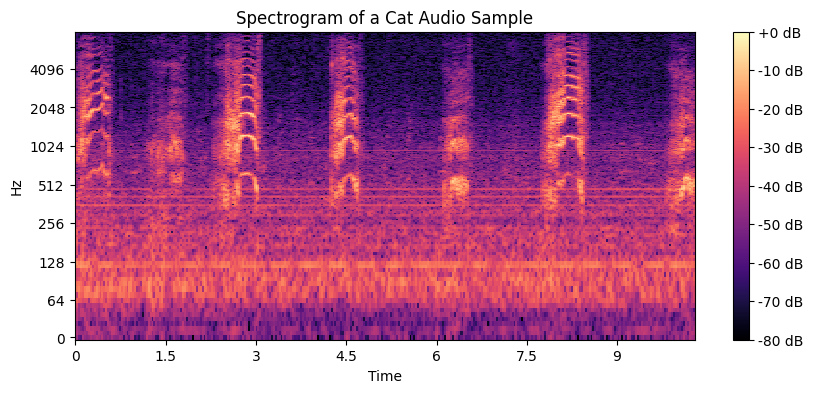

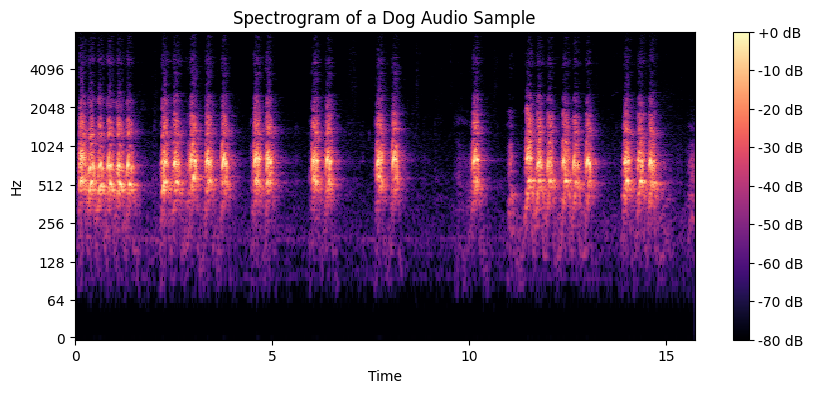

In [ ]:
# Generate a spectrogram for the cat audio
D = librosa.amplitude_to_db(np.abs(librosa.stft(cat_signal)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of a Cat Audio Sample')
plt.show()

# Generate a spectrogram for the dog audio
D = librosa.amplitude_to_db(np.abs(librosa.stft(dog_signal)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of a Dog Audio Sample')
plt.show()


### **Spectrogram Insights Summary:**
**Cat Audio:**

Distinct vocalizations with clear starts and ends.
Bright bands represent vocalizations, separated by quieter periods (darker regions).

**Dog Audio:**

Continuous sound covering a broader frequency range.
Fewer silent periods, indicating sustained barking.
Bright regions across various frequencies indicate the loudness and depth of the bark.

# **Data Preprocessing**

### **Extracting Audio Features:**

In [ ]:
# Function to extract features from an audio file
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    # Extracting MFCCs
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
    # Extracting Chroma
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
    # Extracting Spectral Contrast
    spec_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)
    # Extracting Tonnetz
    tonnetz = np.mean(librosa.feature.tonnetz(y=y, sr=sr), axis=1)

    return np.hstack((mfccs, chroma, spec_contrast, tonnetz))

# Extract features for a sample cat and dog audio
cat_features = extract_features(cat_audio_path)
dog_features = extract_features(dog_audio_path)

print("Features extracted for cat audio:", cat_features.shape[0])
print("Features extracted for dog audio:", dog_features.shape[0])


Features extracted for cat audio: 38
Features extracted for dog audio: 38


### **Handle Missing or Anomalous Data:**

The extracted features for both the cat and dog audio samples are consistent, with 38 features each. This set of features encompasses MFCCs, chroma, spectral contrast, and tonnetz, which will provide a comprehensive representation of the audio characteristics.

# **Clustering and Anomaly Elimination**

# **Clustering**

Expect two main clusters (cats and dogs), but there could be sub-clusters based on different types of vocalizations or sound qualities.

# **Anomaly Detection**

Anomalies in audio data could be corrupted files, audio clips with a lot of background noise, or clips that don't fit the general pattern of the dataset. One approach is to use clustering results: data points that are far from any cluster center can be considered anomalies.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# List of audio files
audio_files = [cat_audio_path, dog_audio_path]  # You can add more audio files here for a more comprehensive clustering

# Extract features for each audio file
features = [extract_features(f) for f in audio_files]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2)  # Assuming two clusters for cats and dogs
clusters = kmeans.fit_predict(scaled_features)

print("Cluster assignments for the audio files:", clusters)


Cluster assignments for the audio files: [1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import os

# Assuming you've already set the path to the dataset folder
audio_folder = "/content/dogs_cats_dataset/cats_dogs"

audio_files = [os.path.join(audio_folder, f) for f in os.listdir(audio_folder) if f.endswith('.wav')]

# Extracting features for all audio files
all_features = [extract_features(f) for f in audio_files]

# Assigning labels based on the filename: 0 for cats and 1 for dogs
labels = [0 if "cat" in f else 1 for f in audio_files]


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=398
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=324
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=497
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=328
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=347
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserW

# **Processing the Entire Dataset:**
## **Feature Extraction for All Audio Files:**

## **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_features, labels, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 221
Testing samples: 56


# **Clustering:**

In [ ]:
from sklearn.cluster import KMeans

# Standardize the features for clustering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_train_scaled)

# It can be interesting to see how many of each label are in the predicted clusters
cluster_0_count = sum(1 for i in range(len(clusters)) if clusters[i] == 0 and y_train[i] == 1)
cluster_1_count = sum(1 for i in range(len(clusters)) if clusters[i] == 1 and y_train[i] == 1)

print("Number of dog audios in Cluster 0:", cluster_0_count)
print("Number of dog audios in Cluster 1:", cluster_1_count)


Number of dog audios in Cluster 0: 0
Number of dog audios in Cluster 1: 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Anomaly Detection:**

We can use the Isolation Forest, a tree-based anomaly detection algorithm, to detect outliers in our training data.

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05)
anomalies = iso_forest.fit_predict(X_train_scaled)

# Anomalies are denoted by -1
anomalous_data_indices = [i for i, x in enumerate(anomalies) if x == -1]
print("Number of anomalies detected:", len(anomalous_data_indices))


Number of anomalies detected: 11


**Clustering:**

The K-means clustering algorithm did not group any dog audio samples into the two formed clusters.
This indicates potential issues:
The chosen features might not be effective for distinguishing between cat and dog audios.
The clusters formed may not directly correspond to "cat" and "dog" labels but could represent other inherent audio characteristics like noise, loudness, or length.
Further analysis could involve examining how many cat audios fall into each cluster.

**Anomaly Detection:**

The Isolation Forest algorithm detected 11 anomalies in the dataset.
These anomalies could be due to unique characteristics or noise present in certain audio samples.
Analyzing these anomalous samples, either by listening or visual inspection of their waveforms/spectrograms, can provide insights into their distinct nature.

## **Model Building**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict on test data
X_test_scaled = scaler.transform(X_test)
y_pred = clf.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



The accuracy of 100% suggests that the model perfectly classified all test samples.

# **AutoML**

In [ ]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML

h2o.init(max_mem_size='16G')



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=a35abba88d5644ec2acfaa6ce9301e63847d34a505c676cdf4dd1d58fb3d075b
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8opr_tpf
  JVM stdout: /tmp/tmp8opr_tpf/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp8opr_tpf/h2o_unknownUser_s

H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,"7 days, 20 hours and 12 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_1ok9rl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Convert lists to DataFrames
X_train_df = pd.DataFrame(X_train, columns=[f"feature_{i}" for i in range(len(X_train[0]))])
y_train_df = pd.DataFrame(y_train, columns=["label"])

X_test_df = pd.DataFrame(X_test, columns=[f"feature_{i}" for i in range(len(X_test[0]))])
y_test_df = pd.DataFrame(y_test, columns=["label"])

# Concatenate them
train = h2o.H2OFrame(pd.concat([X_train_df, y_train_df], axis=1))
test = h2o.H2OFrame(pd.concat([X_test_df, y_test_df], axis=1))



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
print(train[y].table())


  label    Count
      0      221
[1 row x 2 columns]



In [ ]:
unique_labels = set(labels)
print(unique_labels)


{0, 1}


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_features, labels, test_size=0.2, random_state=42, stratify=labels)


In [ ]:
print(set(y_train))


{0, 1}


In [ ]:
import pandas as pd

# Combine X_train and y_train into a single DataFrame
train_df = pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='target')], axis=1)
train = h2o.H2OFrame(train_df)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
x = train.columns
y = "target"  # This should match the target column name in the H2OFrame
x.remove(y)

# Ensure the target is treated as a factor for classification
train[y] = train[y].asfactor()

# Run AutoML
aml = H2OAutoML(max_models=20, seed=42, max_runtime_secs=600)
aml.train(x=x, y=y, training_frame=train)


AutoML progress: |██
06:49:08.456: GBM_1_AutoML_2_20231024_64901 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_2_20231024_64901.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 176.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 177.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 177.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 177.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 177.0.


███████████████████████████████████████

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_2_20231024_64901_model_1


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.004130858478901106
RMSE: 0.06427175490758834
LogLoss: 0.04387869868655896
Mean Per-Class Error: 0.005555555555555556
AUC: 0.9999575911789651
AUCPR: 0.9999709377423711
Gini: 0.9999151823579302

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5118066072463989
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      89   1    0.0111   (1.0/90.0)
1      0    131  0        (0.0/131.0)
Total  89   132  0.0045   (1.0/221.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.511807     0.996198  130
max f2                       0.511807     0.998476  130
max f0point5                 0.874907     0.998464  129
max accuracy                 0.874907     0.995475  129
max precision                0.994989     1         0
max recall                   0.511807     1         130
max specificity              0.994989     1         0
max absolute_mcc             0.874907     0.990687  129
max min_per_class_accuracy   0.874907     0.992366  129
max mean_per_class_accuracy  0.874907     0.996183  129
max tns                      0.994989     90        0
max fns                      0.994989     130       0
max fps                      0.00487114   90        219
max tps                      0.511807     131       130
max tnr                      0.994989     1         0
max fnr                      0.994989     0.992366  0
max fpr                      0.00487114   1         219
max tpr                      0.511807     1         130

Gains/Lift Table: Avg response rate: 59.28 %, avg score: 59.27 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0135747                   0.994355           1.68702  1.68702            1                0.994652   1                           0.994652            0.0229008       0.0229008                  68.7023  68.7023            0.0229008
2        0.0226244                   0.992755           1.68702  1.68702            1                0.993473   1                           0.994181            0.0152672       0.0381679                  68.7023  68.7023            0.0381679
3        0.0316742                   0.992258           1.68702  1.68702            1                0.992658   1                           0.993746            0.0152672       0.0534351                  68.7023  68.7023            0.0534351
4        0.040724                    0.990508           1.68702  1.68702            1                0.991329   1                           0.993209            0.0152672       0.0687023                  68.7023  68.7023            0.0687023
5        0.0542986                   0.990405           1.68702  1.68702            1                0.990449   1                           0.992519            0.0229008       0.0916031                  68.7023  68.7023            0.0916031
6        0.104072                    0.9863             1.68702  1.68702            1                0.988162   1                           0.990435            0.0839695       0.175573                   68.7023  68.7023            0.175573
7        0.153846                    0.982281           1.68702  1.68702            1                0.984334   1

In [ ]:
import zipfile

zip_path = '/content/drive/My Drive/dogs_cats.zip'
unzip_dir = '/content/dogs_cats/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)


In [ ]:
import os
os.listdir(unzip_dir)[:10]  # Display the first 10 items


['cats_dogs', 'utils.py', 'train_test_split.csv']

In [ ]:
cats_dogs_path = os.path.join(unzip_dir, 'cats_dogs')
os.listdir(cats_dogs_path)[:10]  # Display the first 10 items inside the cats_dogs directory


['cat_99.wav',
 'dog_barking_66.wav',
 'dog_barking_87.wav',
 'dog_barking_97.wav',
 'dog_barking_51.wav',
 'cat_106.wav',
 'cat_46.wav',
 'cat_130.wav',
 'cat_165.wav',
 'dog_barking_106.wav']

In [ ]:
import pandas as pd

csv_path = os.path.join(unzip_dir, 'train_test_split.csv')
df = pd.read_csv(csv_path)
df.head()


,Unnamed: 0,test_cat,test_dog,train_cat,train_dog
0,0,cat_22.wav,dog_barking_97.wav,cat_99.wav,dog_barking_33.wav
1,1,cat_116.wav,dog_barking_0.wav,cat_54.wav,dog_barking_86.wav
2,2,cat_155.wav,dog_barking_93.wav,cat_34.wav,dog_barking_45.wav
3,3,cat_58.wav,dog_barking_10.wav,cat_132.wav,dog_barking_76.wav
4,4,cat_77.wav,dog_barking_26.wav,cat_124.wav,dog_barking_4.wav


In [ ]:
!pip install librosa


In [ ]:
!pip install resampy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.3 MB/s eta 0:00:00


In [ ]:
import resampy
print(resampy.__version__)


0.4.2


In [ ]:
!pip install librosa --upgrade


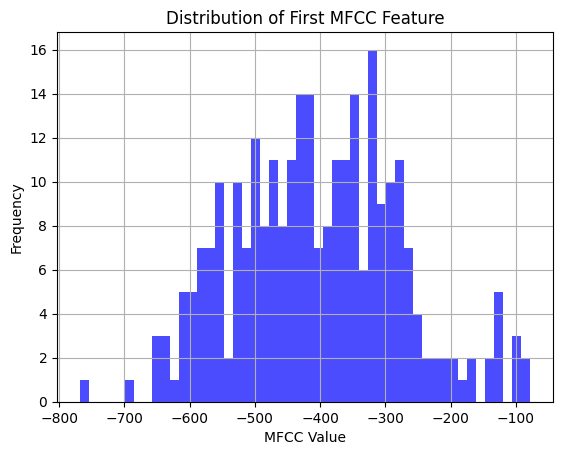

In [ ]:
import matplotlib.pyplot as plt

# Flatten the MFCCs
flattened_mfccs = np.array(features_df['mfccs'].tolist()).reshape(features_df.shape[0], -1)

# Plot the first MFCC feature as an example
plt.hist(flattened_mfccs[:, 0], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of First MFCC Feature')
plt.xlabel('MFCC Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("Data_Distribution_image.jpg")
plt.show()


In [ ]:
import librosa
import numpy as np

def extract_mfcc(file_path, max_pad_len=40):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        if len(audio) == 0:  # Check if the audio duration is too short
            print(f"Problem encountered with file: {file_path}. Skipping due to short duration.")
            return None
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

        if mfccs.shape[1] > max_pad_len:  # If too long, truncate it
            mfccs = mfccs[:, :max_pad_len]
        else:  # If shorter, pad it
            pad_width = max_pad_len - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')

    except Exception as e:
        print(f"Error encountered while parsing file: {file_path}, Error: {e}")
        return None
    return mfccs

# Path to the audio files
audio_files_path = '/content/dogs_cats/cats_dogs/'

# Extracting features for all audio files and storing them in a list
features = []
audio_files = os.listdir(audio_files_path)

for file in audio_files:
    full_path = os.path.join(audio_files_path, file)
    if not os.path.isdir(full_path):  # Skip directories
        mfccs = extract_mfcc(full_path)
        if mfccs is not None:  # Only append if the feature extraction was successful
            features.append([mfccs, file])

# Convert the list into a dataframe
features_df = pd.DataFrame(features, columns=['mfccs', 'file_name'])


In [ ]:
print(features_df.head())


                                               mfccs           file_name
0  [[-163.78275, -145.21652, -159.49629, -158.304...          cat_99.wav
1  [[-437.30325, -311.31024, -233.7747, -177.3300...  dog_barking_66.wav
2  [[-276.16675, -164.60927, -113.37486, -96.3157...  dog_barking_87.wav
3  [[-504.17065, -487.61383, -474.0468, -391.7308...  dog_barking_97.wav
4  [[-366.73657, -322.85526, -313.1575, -298.8285...  dog_barking_51.wav


In [ ]:
# Derive labels from the file_name column
def derive_label(filename):
    if 'cat' in filename:
        return 1
    elif 'dog' in filename:
        return 0
    else:
        return None

features_df['label'] = features_df['file_name'].apply(derive_label)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X = np.array(features_df['mfccs'].tolist())
y = np.array(features_df['label'].tolist())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
pip install tpot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=86a3a64f0934d71e81c41f4c0eefb902f42bfba87f000eda8e6f0af2729b4d59
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
features_df['label'] = features_df['file_name'].apply(lambda x: 'cat' if 'cat' in x else 'dog')


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# Flatten the MFCCs to make it a 2D array
X = np.array(features_df['mfccs'].tolist()).reshape(features_df.shape[0], -1)
y = features_df['label'].values

# Encode the labels 'cat' and 'dog' to 0 and 1
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Splitting data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# Initializing TPOT
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

# Fitting TPOT on the training data
tpot.fit(X_train, y_train_encoded)

# Printing the score
print(tpot.score(X_test, y_test_encoded))

# Exporting the best pipeline
tpot.export('best_pipeline.py')


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9030197444831591

Generation 2 - Current best internal CV score: 0.9030197444831591

Generation 3 - Current best internal CV score: 0.9030197444831591

Generation 4 - Current best internal CV score: 0.9030197444831591

Generation 5 - Current best internal CV score: 0.9030197444831591

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.6000000000000001, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
0.8571428571428571


The model's cross-validation score remained stable across all generations at 0.9030.
TPOT selected the ExtraTreesClassifier as the best model with specific parameters.
The final model achieved an accuracy of approximately 85.71% on the test data, which is slightly lower than the CV score.
This suggests a minor overfitting to the training data.
For further improvement, you can look into feature importance, run TPOT for more generations, consider data augmentation, and explore model interpretability.

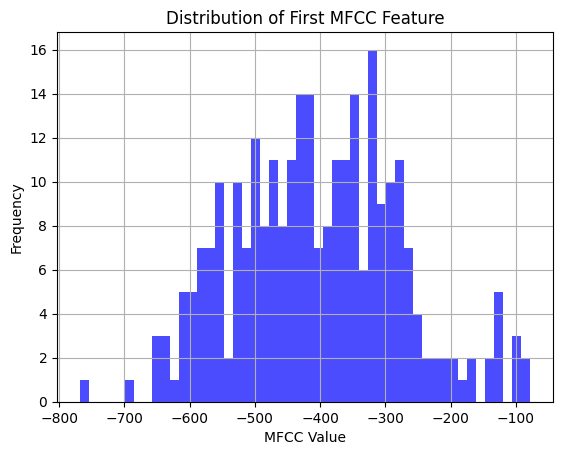

In [ ]:
import matplotlib.pyplot as plt

# Flatten the MFCCs
flattened_mfccs = np.array(features_df['mfccs'].tolist()).reshape(features_df.shape[0], -1)

# Plot the first MFCC feature as an example
plt.hist(flattened_mfccs[:, 0], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of First MFCC Feature')
plt.xlabel('MFCC Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("Data_Distribution_image.jpg")
plt.show()
